In this Notebook, I will show how to apply linear regression using STATSMODELS. I will examine the linear relation between size of a house and its price. In the end I will try to predict the price given the size of house.

### Let's import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set() # A small trick is to import some attributes of matplotlib to seaborn plots

### Let's read the data

In [2]:
data = pd.read_csv('real_estate_price_size.csv')
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [3]:
data.shape

(100, 2)

### Unlike Sklearn, this time we don't need to reshape arrays

In [3]:
x = data['size']
y = data['price']
print('x.shape: {}\ny.shape: {}'.format(x.shape, y.shape))

x.shape: (100,)
y.shape: (100,)


### Let's plot data first

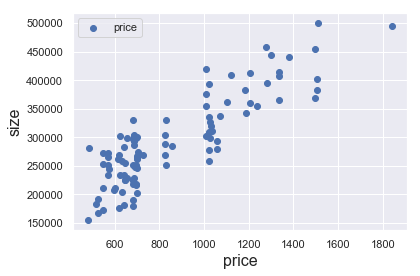

In [6]:
plt.scatter(x, y)
plt.xlabel('price', fontsize=16)
plt.ylabel('size', fontsize=16)
plt.legend()
plt.show()

### Train Test Split
Normally in case of multiple predictors, standardizing (scaling) the input values (before train test split) is important to prevent the cannibalization of some features by others. But here is only one input value.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Create and fit model

In [8]:
x1 = sm.add_constant(x_train)
model = sm.OLS(y_train, x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     237.0
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           2.37e-25
Time:                        15:17:20   Log-Likelihood:                -958.20
No. Observations:                  80   AIC:                             1920.
Df Residuals:                      78   BIC:                             1925.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.085e+05   1.29e+04      8.419      0.000    8.29e+04    1.34e+05
size         218.9882     14.226     15.394      0.000     190.667     247.310
==============================================================================
Omnibus:                        3.777   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                1.979
Skew:                           0.011   Prob(JB):                        0.372
Kurtosis:                       2.230   Cond. No.                     2.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### The advantage of using statsmodels is that, it provides a nice summary table like above. We can simply see that R Squared value is 0.752 and other statistical signicancy tests. The coefficients and intercept are also visible.

##### Below is how prediction and visualizations are done. Compared to sklearn, we have to do some steps manually.

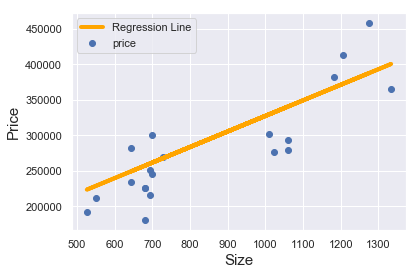

In [9]:
plt.scatter(x_test, y_test)
y_hat = 218.98*x_test + 108500
fig = plt.plot(x_test, y_hat, lw=4, c='orange', label= 'Regression Line')
plt.xlabel('Size', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend()
plt.show()

I hope this notebook was useful, in terms of making an introduction to linear regression with statsmodels library.It has different properties than sklearn and has its own advantages and disadvantages. Using both together can be a smart choice.